## Project: Basketball

#### Group Member: Anyi Chen / Cheng Ren / Xinyuan Tu

#### R1: 
Does three-point shot become popular in the league in recent years and contribute more wins?
#### R2: 
If so, we may assume obtaining high scores matters for an individual. Before the players join NBA, how well wecan apply players’ college basketball data to predict the player’s performance in NBA?
#### R3: 
After players joining NBA, besides score, are other ablities ( such as block, teamwork, steal, and etc.) affect one’s performance? Thus, we are going to explore who are the all-stars and who are potential league icon like LeBron James.

In [1]:
!pip install yellowbrick
!pip check

tensorflow 2.0.0 has requirement tensorboard<2.1.0,>=2.0.0, but you have tensorboard 2.1.0.
okpy 1.13.11 has requirement requests==2.12.4, but you have requests 2.22.0.


In [2]:
# please use pip install if so package is not installed
#import packages needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from yellowbrick.target import FeatureCorrelation
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.cluster import KMeans
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import SpectralClustering
#from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading the data
Due to the working directory issue, we upload the datasets to our own github and create a link for reading.

In [3]:
#loading the data from github the directory will not change
college = pd.read_csv('https://raw.githubusercontent.com/chengren/data100_final/master/college.csv')
standings  =pd.read_csv('https://raw.githubusercontent.com/chengren/data100_final/master/Standings.csv')
box_score = pd.read_csv('https://raw.githubusercontent.com/chengren/data100_final/master/Basketball-BoxScores.csv')
player_box_score = pd.read_csv('https://raw.githubusercontent.com/chengren/data100_final/master/Basketball-PlayerBoxScore.csv')
team_box_score = pd.read_csv('https://raw.githubusercontent.com/chengren/data100_final/master/Basketball-TeamBoxScores.csv')

In [4]:
#Use head() to view the data structure and decide which datasets are going to be applied
college.head()

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
standings.head()

,stDate,teamAbbr,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,...,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5
0,2012-10-30,ATL,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
1,2012-10-30,BKN,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
2,2012-10-30,BOS,14,14th,0,1,L1,loss,1,1.0,...,0.0,-13.0,-13.0,0.072,0.1687,13.8334,68.1666,0.131,10.742,71.258
3,2012-10-30,CHA,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
4,2012-10-30,CHI,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000


In [6]:
box_score.head()

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409


In [7]:
player_box_score.head()

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0,1,0,1,CLE,East,Central,Home,Win,0


In [8]:
team_box_score.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,...,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790


## Data Cleaning
The problems we found in the data, and/or the features we need from the data<br>
Several steps are applied such as:<br>
1. Clean NAs<br>
2. Inspect some wired columns or values<br>
3. Create some features<br>

#### Clean Box Score
This dataset is to analyze the trends in NBA and for visualization. 

In [9]:
(box_score.isna().sum()/len(box_score)*100).value_counts()
#There is no NAs and the variables we are going to use is clean.

0.0    119
dtype: int64

In [10]:
#create a new variable called year
box_score['year'] = pd.DatetimeIndex(box_score['gmDate']).year

#### Clean college data
The purpose of this dataset is to explore how well NCAA data can predict NBA scoring performance.<br>
In this section, we are going to clean the college dataset for analysis purpose. Following steps are applied:<br>
1）Create their main position(e.g some is G-F)<br>
2) Transfer height in numeric<br>
3) Get birth year, age to join NBA and active years <br>
4) University dummy, if players graduate from university with at least twice championships in the history(cite:https://en.wikipedia.org/wiki/NCAA_Division_I_Men%27s_Basketball_Tournament)<br>
5) Deal with NAs in the dataset<br>
6) Create sub dataset by positions<br>

In [11]:
#see all the NAs
college.isna().sum()/len(college)*100

Unnamed: 0            0.000000
active_from           0.000000
active_to             0.000000
birth_date            0.633741
college               6.599650
height                0.021853
name                  0.000000
position              0.021853
url                   0.000000
weight                0.131119
NBA__3ptapg          24.650350
NBA__3ptpct          35.467657
NBA__3ptpg           24.650350
NBA_efgpct           25.131119
NBA_fg%               0.611888
NBA_fg_per_game       0.000000
NBA_fga_per_game      0.000000
NBA_ft%               4.326923
NBA_ft_per_g          0.000000
NBA_fta_p_g           0.000000
NBA_g_played          0.000000
NBA_ppg               0.000000
NCAA__3ptapg         59.178322
NCAA__3ptpct         62.281469
NCAA__3ptpg          59.112762
NCAA_efgpct         100.000000
NCAA_fgapg           43.575175
NCAA_fgpct           43.553322
NCAA_fgpg            43.225524
NCAA_ft              43.312937
NCAA_ftapg           43.356643
NCAA_ftpg            43.225524
NCAA_gam

In [12]:
#Q1)
#there are 0.02% of the player is NAs in position just drop them
college.dropna(subset=['position'],inplace=True)
college['ps1'] = college['position'].str.split('-').str[0]
college['ps2'] = college['position'].str.split('-').str[-1]

In [13]:
#Q2)
#transfer height to numeric
#there are 0.02% of the player is NAs in heights just drop them
college.dropna(subset=['height'],inplace=True)
college['height_cm'] = (college['height'].str.split('-').str[0].astype(float)*12+\
                        college['height'].str.split('-').str[-1].astype(float))*2.54 

In [14]:
#Q3)
#there are 0.6% of the player is NAs in birth date just drop them
college.dropna(subset=['birth_date'],inplace=True)
college['birth_year'] = college['birth_date'].str.split(',').str[-1].astype(int)
college['age_join'] = college['active_from'] - college['birth_year']
college['active_year'] = college['active_to'] - college['active_from']
#college.head()

In [15]:
#Q4)
champion=["University of Kentucky","University of California, Los Angeles","University of North Carolina","Duke University","University of Kansas",
          "North Carolina State University","Villanova University","University of Connecticut","University of Cincinnati","	Indiana University",
          "University of Florida"," Michigan State University","University of Louisville","Oklahoma State University","University of San Francisco"]
pattern = '|'.join(champion)
college['ch_school'] = college['college'].str.contains(pattern, case=False).astype(float)
# college['no_college'] =college['college'].isna().astype(float)
#college.head(10)


In [16]:
#Q5)
#deal with NAs
#drop NCAA_efgpct with all empty
college.drop(columns=['Unnamed: 0','NCAA_efgpct'],inplace=True)
#delete if NCAA_fgpct is NA
college.dropna(subset=['NCAA_fgpct'],inplace=True)
#delete the person with less than 10 NBA or NCAA games
college=college[(college['NBA_g_played']>10)&(college['NCAA_games']>=10)]

In [17]:
#Q6)
#get sub dataset
center=college[college['position'].str.contains("C")]
forward=college[college['position'].str.contains("F")]
guard=college[college['position'].str.contains("G")]

In [18]:
#Q5_2) since each position has there own characteristics, we fill some NAs with mean by postion 
#fillnan with mean
def na_to_mean(df):
  df['NCAA__3ptapg'].fillna(df['NCAA__3ptapg'].mean(), inplace=True)
  df['NCAA__3ptpct'].fillna(df['NCAA__3ptpct'].mean(), inplace=True)
  df['NCAA__3ptpg'].fillna(df['NCAA__3ptpg'].mean(), inplace=True)
na_to_mean(center)
na_to_mean(forward)
na_to_mean(guard)

/srv/conda/envs/data100/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
#check whether it is by postion now
center.head()

,active_from,active_to,birth_date,college,height,name,position,url,weight,NBA__3ptapg,...,NCAA_ftpg,NCAA_games,NCAA_ppg,ps1,ps2,height_cm,birth_year,age_join,active_year,ch_school
0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,0.0,...,1.8,134.0,8.5,F,C,208.28,1968,23,4,1.0
2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,0.0,...,5.0,88.0,26.4,C,C,218.44,1947,23,19,1.0
12,1988,1993,"November 15, 1962",Oral Roberts University,6-11,Mark Acres,F-C,/players/a/acresma01.html,220.0,0.0,...,4.0,110.0,18.5,F,C,210.82,1962,26,5,0.0
15,1976,1988,"July 19, 1954",University of Oklahoma,6-9,Alvan Adams,C-F,/players/a/adamsal01.html,210.0,0.0,...,3.9,73.0,23.4,C,F,205.74,1954,22,12,0.0
21,2014,2018,"July 20, 1993",University of Pittsburgh,7-0,Steven Adams,C,/players/a/adamsst01.html,255.0,0.0,...,1.0,32.0,7.2,C,C,213.36,1993,21,4,0.0


#### Cleaning Play Box Data<br>
The purpose of this dataset is for cluster analysis who is the next super all-star for R3.<br>
Some simple steps are applied:<br>
1) Get feature that needed <br>
2) Normalized dataset

In [20]:
needs=['playLNm','playFNm','playBDate','playPTS','playAST','playTO','playSTL','playBLK','playPF','playFGA','playFGM','playFG%',
       'play2PA','play2PM','play2P%','play3PA','play3PM','play3P%','playFTA','playFTM','playFT%','playORB','playDRB','playTRB']

In [21]:
#select columns
nba_players=player_box_score[needs]

In [22]:
#unique players
nba_players_group=nba_players.groupby(['playLNm','playFNm','playBDate']).mean().reset_index()

In [23]:
nba_players_group_cluster=nba_players_group.iloc[:,3:]

In [24]:
#Normalized dataset
nba_players_group_cluster_n=nba_players_group_cluster
nba_players_group_cluster_n -= nba_players_group_cluster_n.min()
nba_players_group_cluster_n /= nba_players_group_cluster_n.max()

In [25]:
nba_players_group_cluster_n.head()

,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,...,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB
0,0.189786,0.049134,0.092975,0.252319,0.046232,0.416084,0.217267,0.176222,0.364105,0.068359,...,0.260373,0.360665,0.315262,0.345424,0.065646,0.066845,0.259674,0.061538,0.115727,0.102910
1,0.177690,0.066040,0.150719,0.205970,0.153415,0.490061,0.194836,0.179196,0.416819,0.143454,...,0.398986,0.171539,0.140191,0.193806,0.113622,0.100727,0.345035,0.187156,0.280496,0.263626
2,0.112857,0.061350,0.114616,0.285646,0.085069,0.203125,0.141335,0.117017,0.264697,0.122936,...,0.213838,0.089540,0.079148,0.231250,0.086463,0.061182,0.202009,0.056250,0.070982,0.070033
3,0.314050,0.091845,0.313936,0.371693,0.391904,0.683463,0.301820,0.364281,0.554835,0.365025,...,0.555772,0.001709,0.000000,0.000000,0.275763,0.182421,0.435657,0.632558,0.407497,0.517699
4,0.247188,0.151245,0.222588,0.223113,0.236715,0.500000,0.242238,0.255209,0.479690,0.287661,...,0.485906,0.011180,0.000000,0.000000,0.256346,0.215311,0.529838,0.344928,0.412273,0.413565


## Data Visualization <br>
In this section, we are going to explore some characteristics of some variables and some relationship between variables


#### R1
The following visulization is for R1

In [26]:
box_score.head()

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,year
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,...,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,2012
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,...,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,2012
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,...,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,2012
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,...,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409,2012
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409,2012


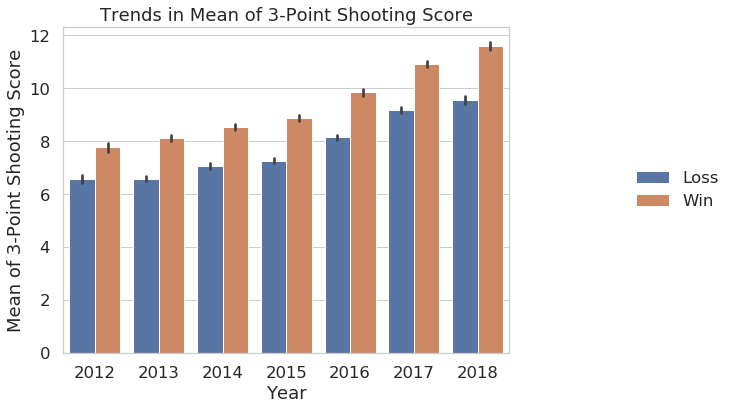

In [27]:
plt.figure(figsize=(8,6))
g = sns.barplot(x='year', y='team3PM', hue='teamRslt', data=box_score)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Trends in Mean of 3-Point Shooting Score')
plt.xlabel('Year')
plt.ylabel('Mean of 3-Point Shooting Score')
plt.show()

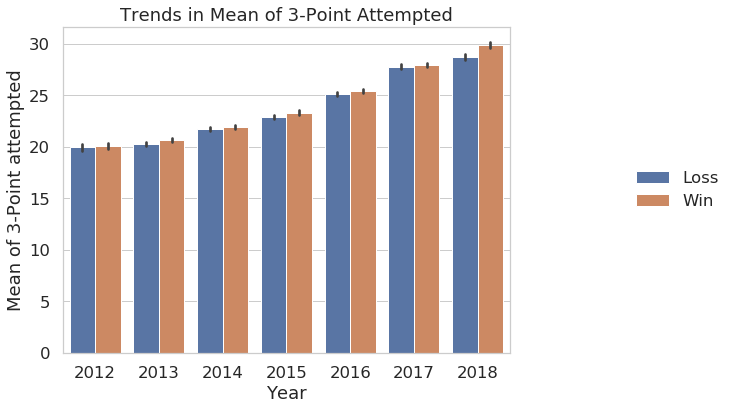

In [28]:
plt.figure(figsize=(8,6))
g = sns.barplot(x='year', y='team3PA', hue='teamRslt', data=box_score)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.title('Trends in Mean of 3-Point Attempted')
plt.xlabel('Year')
plt.ylabel('Mean of 3-Point attempted')
plt.show()

#### R2
The following visulization is for R2

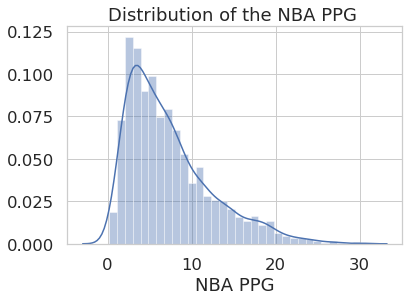

In [29]:
sns.distplot(college['NBA_ppg'], kde=True)
plt.xlabel('NBA PPG')
plt.title('Distribution of the NBA PPG ')
plt.show();

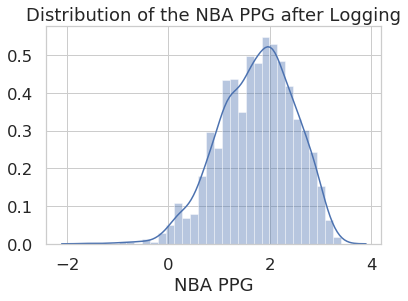

In [30]:
sns.distplot(np.log(college['NBA_ppg']), kde=True,)
plt.xlabel('NBA PPG')
plt.title('Distribution of the NBA PPG after Logging')
plt.show();

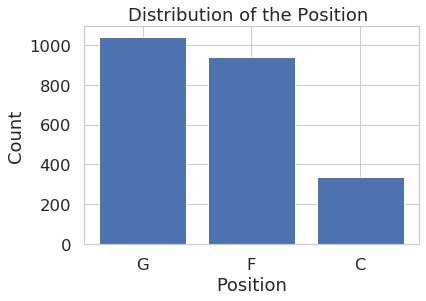

In [31]:
l = college['ps1'].value_counts()
plt.bar(l.index,l.values)
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Distribution of the Position ')
plt.show()

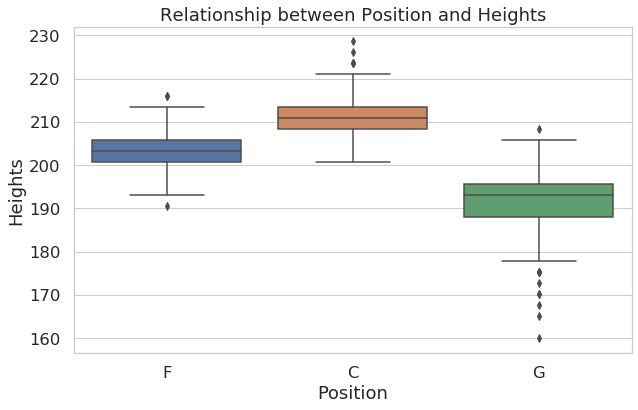

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'ps1', y="height_cm",data = college)
plt.xlabel('Position')
plt.ylabel('Heights')
plt.title('Relationship between Position and Heights')
plt.show()

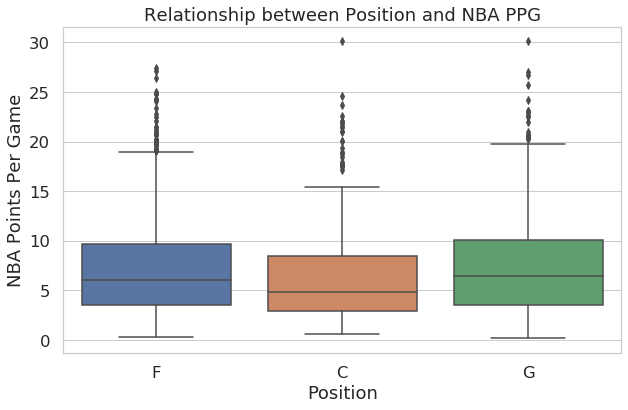

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'ps1', y="NBA_ppg",  data = college)
plt.xlabel('Position')
plt.ylabel('NBA Points Per Game')
plt.title('Relationship between Position and NBA PPG')
plt.show()

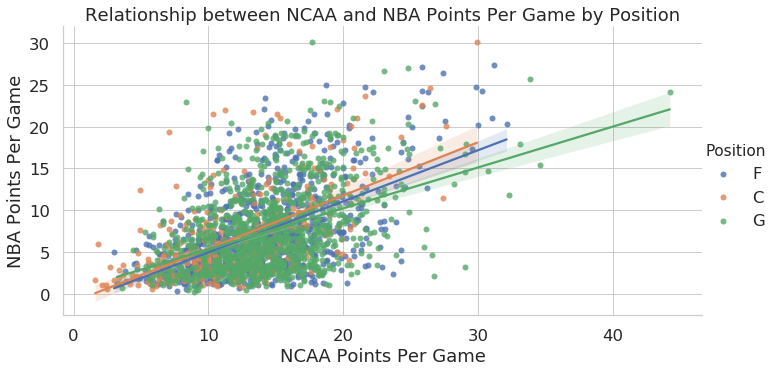

In [34]:
g=sns.lmplot(x='NCAA_ppg', y='NBA_ppg', hue='ps1', data=college,
           fit_reg=True, height=5, aspect=2)
plt.xlabel('NCAA Points Per Game')
plt.ylabel('NBA Points Per Game')
plt.title('Relationship between NCAA and NBA Points Per Game by Position')
g._legend.set_title("Position")
plt.show()

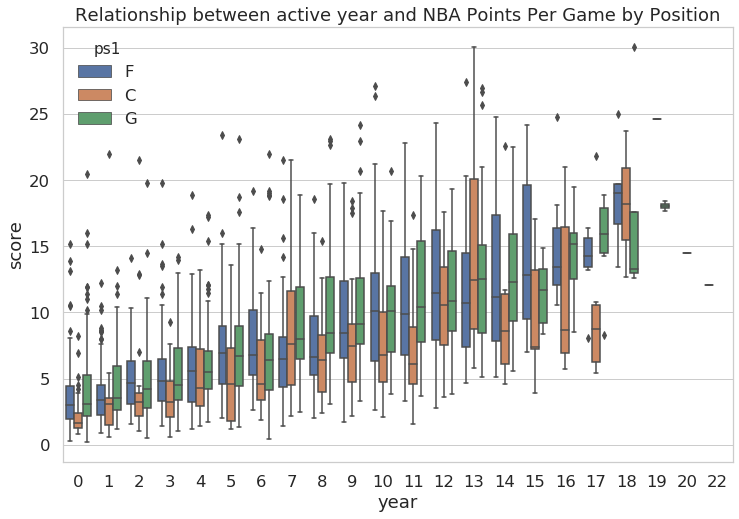

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'active_year', y="NBA_ppg", hue = "ps1", data = college)
plt.xlabel('year')
plt.ylabel('score')
plt.title('Relationship between active year and NBA Points Per Game by Position')
plt.show()

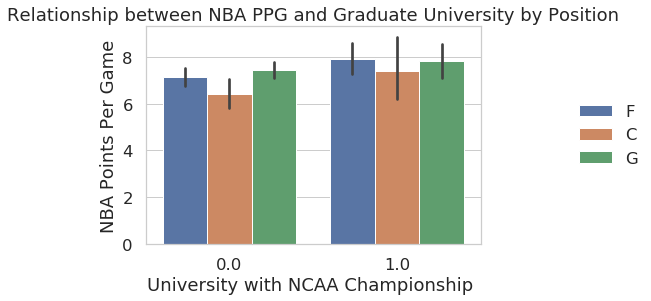

In [36]:
g = sns.barplot(x='ch_school', y='NBA_ppg', hue='ps1', data=college)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.xlabel('University with NCAA Championship ')
plt.ylabel('NBA Points Per Game')
plt.title('Relationship between NBA PPG and Graduate University by Position')
plt.show()

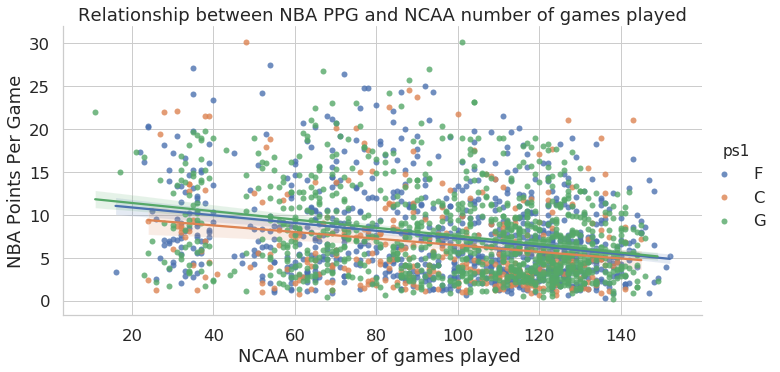

In [37]:
sns.lmplot(x='NCAA_games', y='NBA_ppg', hue='ps1', data=college,
           fit_reg=True, height=5, aspect=2)
plt.xlabel('NCAA number of games played ')
plt.ylabel('NBA Points Per Game')
plt.title('Relationship between NBA PPG and NCAA number of games played')
plt.show()

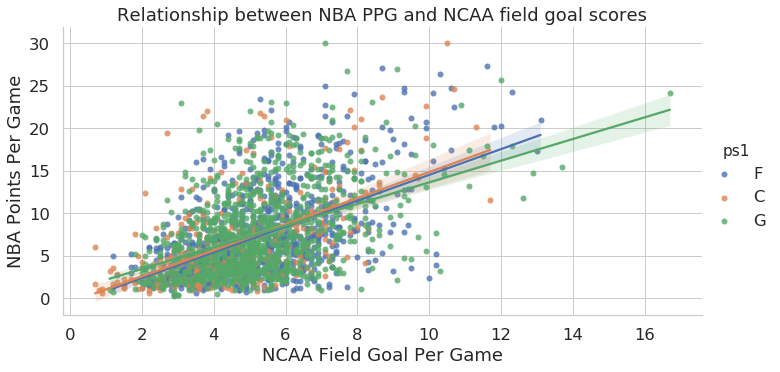

In [38]:
sns.lmplot(x='NCAA_fgpg', y='NBA_ppg', hue='ps1', data=college,
           fit_reg=True, height=5, aspect=2)
plt.xlabel('NCAA Field Goal Per Game')
plt.ylabel('NBA Points Per Game')
plt.title('Relationship between NBA PPG and NCAA field goal scores')
plt.show()
plt.show()

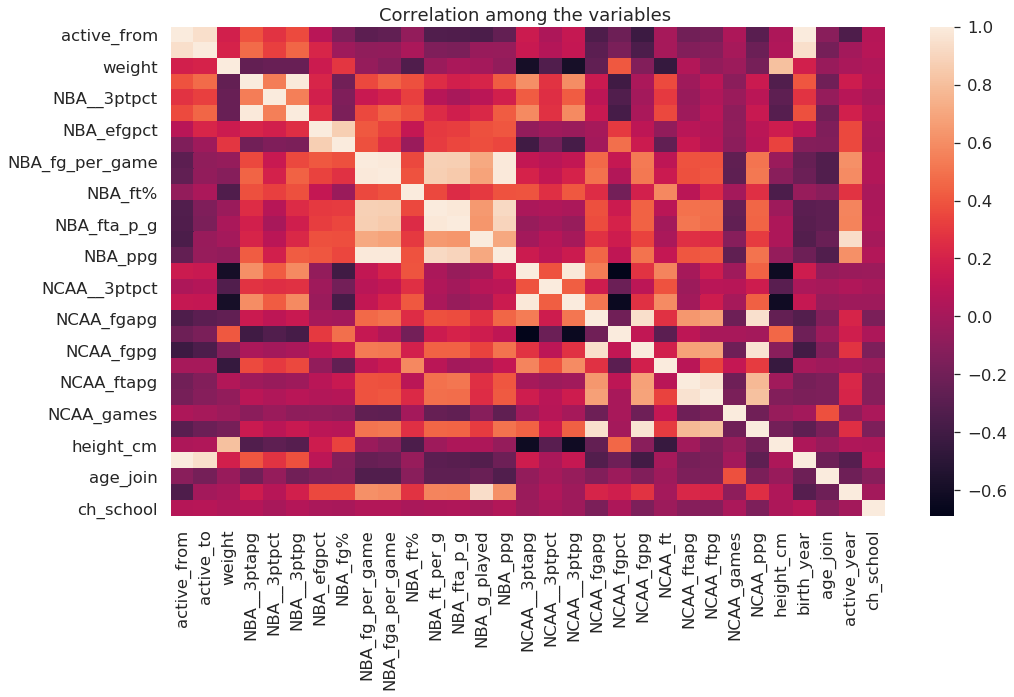

In [39]:
plt.figure(figsize=(16,9))
corr = college.corr()
sns.heatmap(corr)
plt.title('Correlation among the variables ')
#plt.xlabel('Position')
#plt.ylabel('score')
plt.show()

## Method and Experiments

### R2
In this section, we are going to answer the second research question:xxxxx. <br>
The model is to intend predict Players' NBA Points Per Game<br>
Following steps are applied:<br>
1) EDA and variable chosen <br>
2) Training Test Split<br>
3) Model test and choosen<br>


##### With all position

In [40]:
#Some customized functions will be applied
#This function is to evaluate "very accurancy(+-15%)",percentage 
def with_in_15(y_true, y_pred):
  y_true_p = np.array(y_true)*1.15
  y_true_n = np.array(y_true)*0.85
  t_f = (y_pred < y_true_p)&(y_pred > y_true_n)
  return np.mean(t_f)

In [41]:
college_pos = pd.concat([center,forward,guard])

In [42]:
all_train, all_test = train_test_split(college_pos, test_size=0.25, random_state=66)

In [43]:
features = ['NCAA__3ptapg',	'NCAA__3ptpct',	'NCAA__3ptpg',	'NCAA_fgapg',	'NCAA_fgpct',	'NCAA_fgpg', 
            'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games',	'NCAA_ppg',	'height_cm',	'birth_year',
            'age_join',	'ch_school',	'active_year', 'weight']

In [44]:
all_train_X = all_train[features]
all_train_Y = all_train['NBA_ppg']
all_test_X = all_test[features]
all_test_Y = all_test['NBA_ppg']

In [45]:
#Standardization
def standardization(df):
  return (df - df.mean()) / np.std(df)

all_train_stan_X = standardization(all_train_X)
all_test_stan_X = standardization(all_test_X)

/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



FeatureCorrelation(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f913ec4a950>,
                   color=None, feature_index=None, feature_names=None,
                   labels=['NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg',
                           'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft',
                           'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg',
                           'height_cm', 'birth_year', 'age_join', 'ch_school',
                           'active_year', 'weight'],
                   method='mutual_info-regression', sort=False)

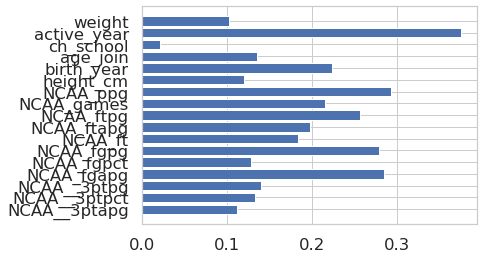

In [46]:
#Feature selection
discrete = [False for _ in range(len(features))]
discrete[1] = True

visualizer = FeatureCorrelation(method='mutual_info-regression', labels=features)

visualizer.fit(all_train_stan_X, all_train_Y, discrete_features=discrete, random_state=0)
visualizer

In [47]:
#Reselect features (dorpping "ch_school")
features = ['NCAA__3ptapg',	'NCAA__3ptpct', 'NCAA__3ptpg',	'NCAA_fgapg',	'NCAA_fgpct',	'NCAA_fgpg', 
            'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games',	'NCAA_ppg',	'height_cm', 'birth_year',
            'age_join',	'active_year', 'weight']
all_train_X = all_train[features]
all_train_Y = all_train['NBA_ppg']
all_test_X = all_test[features]
all_test_Y = all_test['NBA_ppg']
all_train_stan_X = standardization(all_train_X)
all_test_stan_X = standardization(all_test_X)

In [48]:
#LinearRegression with NCAA_ppg
all_model_LR = LinearRegression()
all_model_LR.fit(all_train_stan_X[['NCAA_ppg']], all_train_Y)
print("Train MSE: ", mean_squared_error(all_train_Y, all_model_LR.predict(all_train_stan_X[['NCAA_ppg']])))
print("Test MSE: ", mean_squared_error(all_test_Y, all_model_LR.predict(all_test_stan_X[['NCAA_ppg']])))
print("Test R2:",r2_score(all_test_Y, all_model_LR.predict(all_test_stan_X[['NCAA_ppg']])))
print("Train R2:",r2_score(all_train_Y, all_model_LR.predict(all_train_stan_X[['NCAA_ppg']])))
print("Train high accuracy%",with_in_15(all_train_Y, all_model_LR.predict(all_train_stan_X[['NCAA_ppg']])))
print("Test high accuracy%",with_in_15(all_test_Y, all_model_LR.predict(all_test_stan_X[['NCAA_ppg']])))

Train MSE:  18.947414380756243
Test MSE:  19.923127142888795
Test R2: 0.27118007106331854
Train R2: 0.26717475955444525
Train high accuracy% 0.19054178145087236
Test high accuracy% 0.19421487603305784


In [49]:
#LinearRegression with all features
all_model_LR = LinearRegression()
all_model_LR.fit(all_train_stan_X, all_train_Y)
print("Train MSE: ", mean_squared_error(all_model_LR.predict(all_train_stan_X), all_train_Y))
print("Test MSE: ", mean_squared_error(all_model_LR.predict(all_test_stan_X), all_test_Y))
print("Train R2:",r2_score(all_train_Y, all_model_LR.predict(all_train_stan_X)))
print("Test R2:",r2_score(all_test_Y, all_model_LR.predict(all_test_stan_X)))
print("Train high accuracy%",with_in_15(all_train_Y, all_model_LR.predict(all_train_stan_X)))
print("Test high accuracy%",with_in_15(all_test_Y, all_model_LR.predict(all_test_stan_X)))

Train MSE:  11.562722248047233
Test MSE:  12.49422099037166
Train R2: 0.5527909749925373
Test R2: 0.5429413671351233
Train high accuracy% 0.2502295684113866
Test high accuracy% 0.2534435261707989


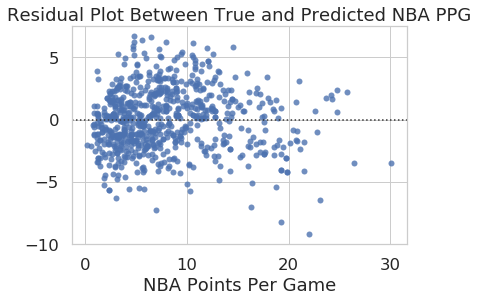

In [50]:
sns.residplot(all_test_Y, all_model_LR.predict(all_test_stan_X))
plt.xlabel('NBA Points Per Game')
plt.title('Residual Plot Between True and Predicted NBA PPG');

In [51]:
#cross validation functions
def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=8)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

def cross_validate_R2(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=8)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(r2_score(y, model.predict(X)))
    return np.mean(rmse_values)

In [52]:
#Fine tune the hyperparameters of RandomForest
errors = []
for N in range(1, 10):
  model = RandomForestRegressor(n_estimators=N, random_state=43, min_samples_leaf = 5, max_depth=8)
  error = cross_validate_rmse(model, all_train_stan_X, all_train_Y)
  #error = cross_validate_R2(model, all_train_stan_X, all_train_Y)
  errors.append(error)
best_para = errors.index(min(errors)) + 1
best_para

8

In [53]:
#RandomForest with standardized data
all_forest = RandomForestRegressor(n_estimators=8, random_state=43, min_samples_leaf = 5, max_depth=8)
all_forest.fit(all_train_stan_X, all_train_Y)
print("Train MSE: ", mean_squared_error(all_forest.predict(all_train_stan_X), all_train_Y))
print("Test MSE: ", mean_squared_error(all_forest.predict(all_test_stan_X), all_test_Y))
print("Train R2: ",  r2_score(all_train_Y, all_forest.predict(all_train_stan_X)))
print("Test R2: ",  r2_score(all_test_Y, all_forest.predict(all_test_stan_X)))
print("Train high accuracy%",with_in_15(all_train_Y, all_forest.predict(all_train_stan_X)))
print("Test high accuracy%",with_in_15(all_test_Y, all_forest.predict(all_test_stan_X)))

Train MSE:  5.822432443667157
Test MSE:  10.32634245035405
Train R2:  0.7748069805322914
Test R2:  0.6222458393772203
Train high accuracy% 0.36960514233241504
Test high accuracy% 0.2892561983471074


In [54]:
#Fine tune the hyperparameters of KNN
errors = []
for N in range(1, 30):
  model = KNeighborsRegressor(N)
  error = cross_validate_rmse(model, all_train_stan_X, all_train_Y)
  errors.append(error)
best_para = errors.index(min(errors)) + 1
best_para

13

In [55]:
#KNN with standardized data   
all_model_KNN = KNeighborsRegressor(13)
all_model_KNN.fit(all_train_stan_X, all_train_Y)
print("Train MSE: ", mean_squared_error(all_train_Y, all_model_KNN.predict(all_train_stan_X)))
print("Test MSE: ", mean_squared_error(all_test_Y, all_model_KNN.predict(all_test_stan_X)))
print("Train R2: ",  r2_score(all_train_Y, all_model_KNN.predict(all_train_stan_X)))
print("Test R2: ",  r2_score(all_test_Y, all_model_KNN.predict(all_test_stan_X)))
print("Train high accuracy%",with_in_15(all_train_Y, all_model_KNN.predict(all_train_stan_X)))
print("Test high accuracy%",with_in_15(all_test_Y, all_model_KNN.predict(all_test_stan_X)))

Train MSE:  10.189100852527426
Test MSE:  12.826927233605554
Train R2:  0.6059182465676672
Test R2:  0.5307704394081945
Train high accuracy% 0.24839302112029385
Test high accuracy% 0.2465564738292011


In [ ]:
#Fine tune the hyperparameters of SVR
# May need 1.5 mins, SLOW
epsilons = np.arange(0.1, 2.0, 0.2)
Cs = np.arange(0.1, 1.0, 0.1)
errors = []
for epsilon_ in epsilons:
  errors.append(list(cross_validate_rmse(SVR(kernel ='linear', epsilon=epsilon_, C=C_), all_train_stan_X, all_train_Y) for C_ in Cs))
errors = np.array(errors)
best_para = np.where(errors==np.min(errors))
best_epsilon = epsilons[best_para[0]]
best_C = Cs[best_para[1]]
best_epsilon, best_C

In [ ]:
#SVR with standardized data  
all_model_SVM = SVR(kernel ='linear', epsilon=1.9, C=.4)
all_model_SVM.fit(all_train_stan_X, all_train_Y)
print("Train MSE: ", mean_squared_error(all_model_SVM.predict(all_train_stan_X), all_train_Y))
print("Test MSE: ", mean_squared_error(all_model_SVM.predict(all_test_stan_X), all_test_Y))
print("Train R2:",r2_score(all_train_Y, all_model_SVM.predict(all_train_stan_X)))
print("Test R2:",r2_score(all_test_Y, all_model_SVM.predict(all_test_stan_X)))
print("Train high accuracy%",with_in_15(all_train_Y, all_model_SVM.predict(all_train_stan_X)))
print("Test high accuracy%",with_in_15(all_test_Y, all_model_SVM.predict(all_test_stan_X)))

#### If we predict the NBA PPG based on each position


##### Center

In [ ]:
C_train, C_test = train_test_split(center, test_size=0.2, random_state=42)

In [ ]:
C_train_X = C_train[features]
C_train_Y = C_train['NBA_ppg']
C_test_X = C_test[features]
C_test_Y = C_test['NBA_ppg']
C_train_stan_X = standardization(C_train_X)
C_test_stan_X = standardization(C_test_X)

In [ ]:
#LinearRegression with standardized data
C_model_LR = LinearRegression()
C_model_LR.fit(C_train_stan_X, C_train_Y)

print("Train MSE: ", mean_squared_error(C_train_Y, C_model_LR.predict(C_train_stan_X)))
print("Test MSE: ", mean_squared_error(C_test_Y, C_model_LR.predict(C_test_stan_X)))
print("Train R2:", r2_score(C_train_Y, C_model_LR.predict(C_train_stan_X)))
print("Test R2:", r2_score(C_test_Y, C_model_LR.predict(C_test_stan_X)))
print("Train high accuracy%",with_in_15(all_train_Y, C_model_LR.predict(all_train_stan_X)))
print("Test high accuracy%",with_in_15(all_test_Y, C_model_LR.predict(all_test_stan_X)))

In [ ]:
#Fine tune the hyperparameters of RandomForest
#Warning: slow 
errors = []
for N in range(1, 20):
  model = RandomForestRegressor(n_estimators=N, random_state=43, min_samples_leaf = 4, max_depth=8)
  error = cross_validate_rmse(model, C_train_stan_X, C_train_Y)
  #error = cross_validate_R2(model, C_train_stan_X, C_train_Y)
  errors.append(error)
best_para = errors.index(min(errors)) + 1
best_para

In [ ]:
#RandomForest with standardized data
C_forest = RandomForestRegressor(n_estimators=15, random_state=43, min_samples_leaf = 4, max_depth=8)
C_forest.fit(C_train_stan_X, C_train_Y)
print("Train MSE: ", mean_squared_error(C_forest.predict(C_train_stan_X), C_train_Y))
print("Test MSE: ", mean_squared_error(C_forest.predict(C_test_stan_X), C_test_Y))
print("Train R2: ",  r2_score(C_train_Y, C_forest.predict(C_train_stan_X)))
print("Test R2: ",  r2_score(C_test_Y, C_forest.predict(C_test_stan_X)))
print("Train high accuracy%",with_in_15(C_train_Y, C_forest.predict(C_train_stan_X)))
print("Test high accuracy%",with_in_15(C_test_Y, C_forest.predict(C_test_stan_X)))

In [ ]:
#Fine tune the hyperparameters of KNN
errors = []
for N in range(1, 50):
  model = KNeighborsRegressor(N)
  error = cross_validate_rmse(model, C_train_stan_X, C_train_Y)
  #error = cross_validate_R2(model, C_train_stan_X, C_train_Y)
  errors.append(error)
best_para = errors.index(min(errors)) + 1
best_para

In [ ]:
#KNN with standardized data   
C_model_KNN = KNeighborsRegressor(8)
C_model_KNN.fit(C_train_stan_X, C_train_Y)
print("Train MSE: ", mean_squared_error(C_train_Y, C_model_KNN.predict(C_train_stan_X)))
print("Test MSE: ", mean_squared_error(C_test_Y, C_model_KNN.predict(C_test_stan_X)))
print("Train R2: ",  r2_score(C_train_Y, C_model_KNN.predict(C_train_stan_X)))
print("Test R2: ",  r2_score(C_test_Y, C_model_KNN.predict(C_test_stan_X)))
print("Train high accuracy%",with_in_15(C_train_Y, C_model_KNN.predict(C_train_stan_X)))
print("Test high accuracy%",with_in_15(C_test_Y, C_model_KNN.predict(C_test_stan_X)))

In [ ]:
#Fine tune the hyperparameters of SVR
# May need 1 min, SLOW
epsilons = np.arange(0.1, 2.0, 0.2)
Cs = np.arange(0.1, 1.0, 0.1)
errors = []
for epsilon_ in epsilons:
  errors.append(list(cross_validate_rmse(SVR(kernel ='linear', epsilon=epsilon_, C=C_), C_train_stan_X, C_train_Y) for C_ in Cs))
errors = np.array(errors)
best_para = np.where(errors==np.min(errors))
best_epsilon = epsilons[best_para[0]]
best_C = Cs[best_para[1]]
best_epsilon, best_C

In [ ]:
#SVR with standardized data  
C_model_SVM = SVR(kernel ='linear', epsilon=1.5, C=0.3)
C_model_SVM.fit(C_train_stan_X, C_train_Y)
print("Train MSE: ", mean_squared_error(C_model_SVM.predict(C_train_stan_X), C_train_Y))
print("Test MSE: ", mean_squared_error(C_model_SVM.predict(C_test_stan_X), C_test_Y))
print("Train R2:",r2_score(C_train_Y, C_model_SVM.predict(C_train_stan_X)))
print("Test R2:",r2_score(C_test_Y, C_model_SVM.predict(C_test_stan_X)))
print("Train high accuracy%",with_in_15(C_train_Y, C_model_SVM.predict(C_train_stan_X)))
print("Test high accuracy%",with_in_15(C_test_Y, C_model_SVM.predict(C_test_stan_X)))

### R3
This section is going to answer Research Question 3 : who are potential league icons


In [ ]:
# fit a cluster analysis and pick best cluster
df_transformed = nba_players_group_cluster_n
sum_of_sq_dist = []
K = range(1,15)
for n in K:
    kmeans = KMeans(n_clusters=n)
    kmeans = kmeans.fit(df_transformed)
    sum_of_sq_dist .append(kmeans.inertia_)
plt.plot(K, sum_of_sq_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Fit k-means
kmeans = KMeans(n_clusters=6, random_state=66)
kmeans.fit(nba_players_group_cluster_n)
nba_players_group_cluster['group']=kmeans.labels_
clusters = nba_players_group_cluster.groupby('group').mean()
clusters

In [ ]:
#use PCA to dimensionality reduction 
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(nba_players_group_cluster_n)

In [ ]:
#join the two dimension with other information like date, name and group
data = pd.DataFrame(principalComponents)
data.columns = ['x', 'y']
data['date'] = nba_players_group['playBDate']
data['fn'] = nba_players_group['playFNm']
data['ln'] = nba_players_group['playLNm']
data['name']=data['fn'] +" "+ data['ln']
data['group']=kmeans.labels_

In [ ]:
#plot the groups
fig = px.scatter(data, x="x", y="y",color="group",hover_name="name")
fig.update_layout(
    title="'NBA Players clustering result based on player box score data'",
    xaxis_title="First Component",
    yaxis_title="Second Component",
    )
fig.show()

In [ ]:
#find LeBron Jame's group
grp = data[data['name']=='LeBron James'].iloc[0,6]
grp

In [ ]:
# make date as date time and make players filter by date
data['date']= pd.to_datetime(data['date'])

In [ ]:
#find who is young enough and in the same group with LeBron Jame
data[(data['group']==grp) & (data['date']>pd.Timestamp(1994,1,1))]